# Final Project - Best Neighborhood in Pittsburgh

In [146]:
import pandas as pd
import geopandas as gpd

In [186]:
# import the dog license data
data = pd.read_csv("dogs_valid.csv")
# display first 5 data points
data.head(5)

_id                 LicenseType               Breed    Color  DogName  \
0  23445643  Dog Lifetime Spayed Female  LABRADOR RETRIEVER   YELLOW    SASHA   
1  23445644  Dog Lifetime Neutered Male  LABRADOR RETRIEVER    BROWN     JAKE   
2  23445645  Dog Lifetime Spayed Female               MIXED  SPOTTED   SHILOH   
3  23445646  Dog Lifetime Spayed Female             LAB MIX    BROWN  BLONDIE   
4  23445647  Dog Lifetime Spayed Female        AUS SHEPHERD    MULTI    SASHA   

   OwnerZip  ExpYear            ValidDate  
0     15137     2099  2005-01-31T00:00:00  
1     15129     2099  2004-06-21T00:00:00  
2     15129     2099  2006-01-20T00:00:00  
3     15140     2099  2005-07-18T00:00:00  
4     15238     2099  2004-02-25T00:00:00

In [189]:
# sort data by which dog licenses, and presumably dogs, live where
data.groupby("OwnerZip").count()

_id  LicenseType  Breed  Color  DogName  ExpYear  ValidDate
OwnerZip                                                             
15003      34           34     34     34       34       34         34
15005      55           55     55     55       55       55         55
15006      10           10     10     10       10       10         10
15007      10           10     10     10       10       10         10
15012       4            4      4      4        4        4          4
...       ...          ...    ...    ...      ...      ...        ...
16342       1            1      1      1        1        1          1
32081       1            1      1      1        1        1          1
33426       1            1      1      1        1        1          1
46845       1            1      1      1        1        1          1
47909       1            1      1      1        1        1          1

[131 rows x 7 columns]

In [203]:
# some areas don't seem to have a lot of dogs, so we will filter those out
def func(x):
    return len(x) > 1000

pop_zip = data.groupby("OwnerZip").filter(func)

# display zip codes again
pop_zip.groupby("OwnerZip").count()

_id  LicenseType  Breed  Color  DogName  ExpYear  ValidDate
OwnerZip                                                              
15025     1024         1024   1024   1024     1024     1024       1024
15037     1040         1040   1040   1040     1040     1040       1040
15044     1579         1579   1579   1577     1579     1579       1579
15090     1292         1292   1292   1289     1292     1292       1292
15101     1406         1406   1406   1406     1406     1406       1406
15102     1566         1566   1566   1564     1566     1566       1566
15108     1617         1617   1617   1614     1617     1617       1617
15122     1403         1403   1403   1403     1403     1403       1403
15143     1312         1312   1312   1312     1312     1312       1312
15146     1356         1356   1356   1355     1356     1356       1356
15227     1383         1383   1383   1381     1383     1383       1383
15235     1519         1519   1518   1518     1519     1519       1519
15236     1864         1864   1864   1860     1864     1864       1864
15237     2639         2639   2639   2638     2639     2639       2639
15239     1442         1442   1442   1440     1442     1442       1442

<Axes: >

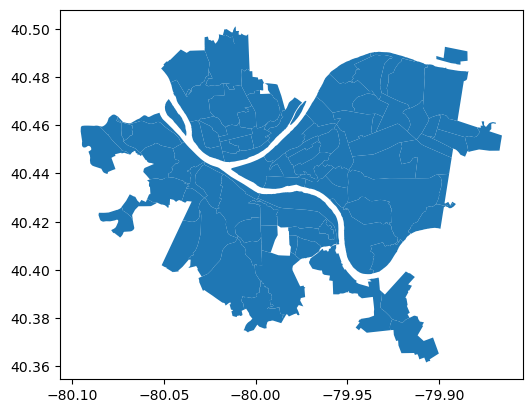

In [180]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot()